<a href="https://colab.research.google.com/github/PrachitiSParulekar/ML/blob/main/Day_6_sampling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler , SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [41]:
!pip install imblearn

In [42]:
X, y = make_classification(
    n_samples=5000,
    n_features=10,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42)

In [43]:
X_train, X_test, y_train , y_test = train_test_split(X, y,
                  stratify=y, random_state=42)

In [44]:
def evaluate_model(X_train, y_train, X_test, y_test, desc, results):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        'Method': desc,
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0),

    })
    results = []

In [45]:
results = []

In [46]:
#Baseline
evaluate_model(X_train, y_train, X_test, y_test, 'Baseline', results)

In [47]:
#random oversampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
evaluate_model(X_train_ros, y_train_ros, X_test, y_test, 'RandomOverSampler', results)

In [48]:
#random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
evaluate_model(X_train_rus, y_train_rus, X_test, y_test, 'RandomUnderSampler', results)

In [49]:
#smote
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
evaluate_model(X_train_smote, y_train_smote, X_test, y_test, 'SMOTE', results)

In [50]:
#class weight
clf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)
results.append({
    'Method': 'Cost- Sensitive',
    'precision': precision_score(y_test, y_pred_weighted, zero_division=0),
    'recall': recall_score(y_test, y_pred_weighted, zero_division=0),
    'F1': f1_score(y_test, y_pred_weighted, zero_division=0),

})

In [51]:
result_df = pd.DataFrame(results)
display(result_df.head())

,Method,precision,recall,F1
0,Baseline,0.750000,0.521739,0.615385
1,RandomOverSampler,0.688525,0.608696,0.646154
2,RandomUnderSampler,0.324675,0.724638,0.448430
3,SMOTE,0.544304,0.623188,0.581081
4,Cost- Sensitive,0.734694,0.521739,0.610169


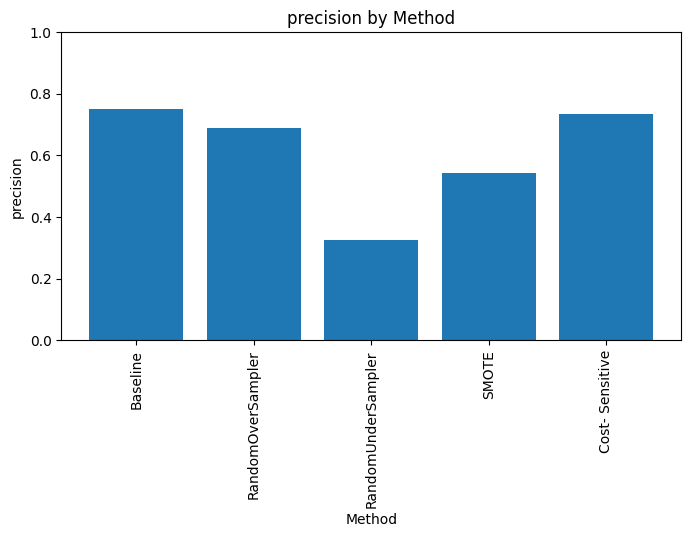

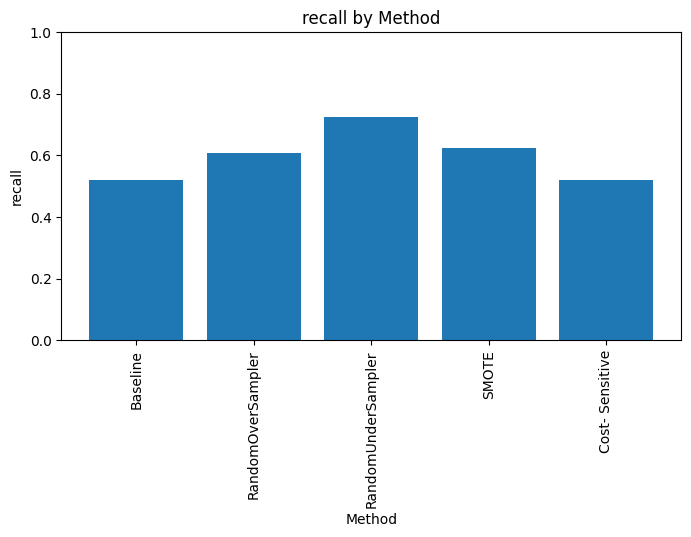

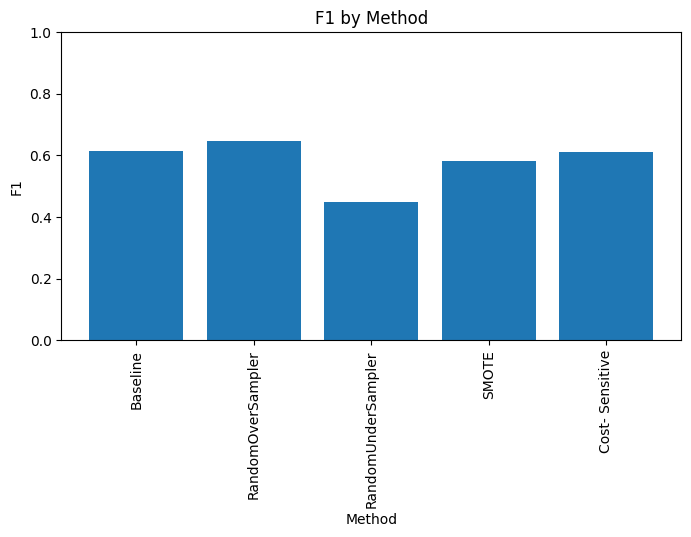

In [52]:
metrics = ['precision', 'recall', 'F1']
for metric in  metrics:
    plt.figure(figsize=(8,4))
    plt.bar(result_df['Method'], result_df[metric])
    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.title(f'{metric} by Method')
    plt.xticks(rotation=90)
    plt.show()

In [53]:
result_df

,Method,precision,recall,F1
0,Baseline,0.750000,0.521739,0.615385
1,RandomOverSampler,0.688525,0.608696,0.646154
2,RandomUnderSampler,0.324675,0.724638,0.448430
3,SMOTE,0.544304,0.623188,0.581081
4,Cost- Sensitive,0.734694,0.521739,0.610169


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [54]:
#set up hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10,20],
    'min_samples_split': [2, 5, 10],
    }

In [57]:
#set up stratified cross-validation
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [60]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

In [61]:
#fit GridSeatchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [62]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
0.6285794462303222


In [64]:
#validate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)